# Install package


In [1]:
!pip install emoji
!pip install pythainlp

     |████████████████████████████████| 175 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=79277b62339d0d314d02cee304ce2659102f6c98fb2ff9862cefb64ef3aca40a
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 11.5 MB 5.2 MB/s 


In [2]:
import tweepy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import emoji
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

 ## Data Processing

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
sheet1 = pd.read_excel('/content/gdrive/My Drive/dataset_701/sinovac_astra.xlsx',sheet_name='Sheet1')

In [5]:
sheet1.shape

(215, 3)

In [6]:
sheet1.head()

user_name     create_at  \
0        @Avebuue   Apr 8, 2022   
1  @KhaosodOnline  Mar 26, 2022   
2     @Secretmew2  Mar 19, 2022   
3    @jeleejunlee  Mar 18, 2022   
4     @MrsSaraAya  Feb 11, 2022   

                                                text  
0  คนที่ฉีดวัคซีนที่ไม่มีโรคประจำก็ไม่เป็นหนักแต่...  
1  นัดเข็ม 4  สถาบันบำราศนราดูร เปิดให้ลงทะเบียน ...  
2  ฉีดอะไรก็ได้ค่ะ เพราะนี่ฉีดมา 3 เข็ม ไขว้ ซิโน...  
3  สอบถามค่ะ มีใครฉีดวัคซีนแบบไขว้ ซิโนแวค+แอสตร้...  
4  เอ่อ...เราฉีดวัคซีนไขว้ ซิโนแวค แอสตร้า ไปประม...

In [7]:
sheet2 = pd.read_excel('/content/gdrive/My Drive/dataset_701/sinovac_astra.xlsx',sheet_name='Sheet2')

In [8]:
sheet2.shape

(25, 3)

In [9]:
sheet2.head()

user_name     create_at  \
0   @Thansettakij  Sep 14, 2021   
1    @Tik_Nuttaya  Aug 30, 2021   
2        @520beam  Aug 29, 2021   
3  @Thememory9197  Aug 26, 2021   
4      @BkkKatang  Aug 19, 2021   

                                                text  
0  รพ.พนัสนิคม เปิดให้ประชาชนในพื้นที่ วอล์ก อิน ...  
1  ลุงกับป้าเราค่ะ ลุง 79 ป้า.63 มีโรคประจำตัวทั้...  
2  พี่ชายเราเป็นไทรรอย น้ำหนักตัว120กิโล เข็มแรกซ...  
3  เข็มแรก ซิโนแวค- เข็ม2 แอสตร้าเซนเนก้า คะ ฉีดเ...  
4  2 ทำไมต้องสั่ง Sinovac เพิ่ม ปัจจุบันนี้ ประเท...

In [10]:
data1 = sheet1[['text']]
data2 = sheet2[['text']]
data3 = pd.concat([data1,data2])

In [11]:
data3.shape

(240, 1)

# Bag-of-Words

In [12]:
def slash_tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

d_data = data3["text"].dropna()
vectorizer = CountVectorizer(tokenizer=slash_tokenize)
transformed_data = vectorizer.fit_transform(d_data)
hash_tag_cnt_df= pd.DataFrame(columns = ['word', 'count']) 
hash_tag_cnt_df['word'] = vectorizer.get_feature_names()
hash_tag_cnt_df['count'] = np.ravel(transformed_data.sum(axis=0))
hash_tag_cnt_df.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word  count
58                                      matichon.co.th      8
57                                               local      7
76                                        quality-life      6
61                                                news      5
212  ลูกชายเศร้า แม่เสียชีวิตหลังฉีดวัคซีนไขว้ ซิโน...      4
313                                … thebangkokinsight      3
44                                            covid-19      3
39                                              bit.ly      3
37                                          acnews.net      3
80                               thebangkokinsight.com      3

In [13]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    text = text.replace("%","เปอร์เซ็นต์")
    text = text.replace("ฯ"," ")
    text = text.replace("#"," ")
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in data3["text"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word  count
1001    แอ     289
626     สต     286
1018    โน     269
173     ซิ     268
559    ร้า     263
996    แวค     258
1051  ไขว้     232
144    ฉีด     219
802   เข็ม     128
693   สูตร     117

In [14]:
!wget "https://www.f0nt.com/download/sipafonts/THSarabunNew.zip"
!unzip "THSarabunNew.zip"


--2022-04-23 15:54:38--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2022-04-23 15:54:40--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K   422KB/s    in 1.0s    

2022-04-23 15:54:41 (422 KB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: THSarabunNew Italic.ttf  
   creating: __MACOSX/
  inflating: __MACOSX/._THSarabunNew Italic.ttf  
  inflating: THSarabunNew.ttf        
  inflating: __MACOSX/._THSarabunNew.ttf  
  inflating: TH

In [15]:
!mv THSarabunNew.ttf /usr/share/fonts/truetype/

In [16]:
path = '/usr/share/fonts/truetype/THSarabunNew'

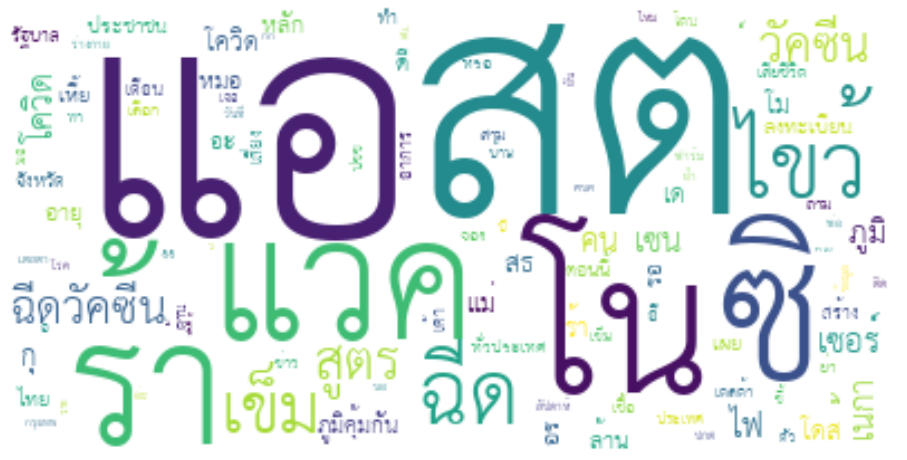

In [17]:
word_dict = {}
for i in range(0,len(keyword_df2)):
  word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path=path,background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [18]:
import requests
url = "https://api.aiforthai.in.th/ssense"

data = {'text':data3.iloc[48]}
headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
 
response = requests.post(url, data=data, headers=headers)


print(response.json())

{'sentiment': {'score': '0', 'polarity-neg': False, 'polarity-pos': False, 'polarity': ''}, 'preprocess': {'input': 'จริง เหมือนไม่เห็นหัวจังหวัดกุ ทั้งที่จังหวัดมันแหล่งอุตสาหกรรม คนเยอะมากๆ แต่วัคซีนมีแค่สูตรไขว้ซิโนแวค แอสตร้า', 'neg': [], 'pos': [], 'segmented': ['จริง', ' ', 'เหมือน', 'ไม่เห็น', 'หัว', 'จังหวัด', 'กุ', ' ', 'ทั้งที่', 'จังหวัด', 'มัน', 'แหล่ง', 'อุตสาหกรรม', ' ', 'คน', 'เยอะ', 'มากๆ', ' ', 'แต่', 'วัคซีน', 'มี', 'แค่', 'สูตร', 'ไขว้', 'ซิ', 'โน', 'แว', 'ค', ' ', 'แอ', 'สต', 'ร้า'], 'keyword': ['จริง', 'เหมือน', 'หัว', 'จังหวัด', 'กุ', 'ทั้งที่', 'จังหวัด', 'แหล่ง', 'อุตสาหกรรม', 'คน', 'เยอะ', 'มากๆ', 'วัคซีน', 'แค่', 'สูตร', 'ไขว้', 'ซิ', 'โน', 'แว', 'แอ', 'ร้า']}, 'alert': [], 'comparative': [], 'associative': [], 'intention': {'request': '0', 'sentiment': '0', 'question': '0', 'announcement': '0'}}


In [19]:
import requests
import seaborn as sns
import pandas as pd
import json

for i in range(0,240):
  url = "https://api.aiforthai.in.th/ssense"
  data = {'text':data3.iloc[i]}
  headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
  response = requests.post(url, data=data, headers=headers)
  #print(response.json())
  j1 = json.loads(response.text)
  j2 = j1["sentiment"]
  j3 = j2["polarity"]

  print(j3)
  #sns.lineplot(j3)

negative



negative


negative

negative

negative




negative
positive
negative

negative
negative





positive



negative
negative



negative
positive



negative

negative

negative
positive
negative




negative
negative
negative
negative
negative



negative




negative
positive
negative
negative

negative



negative
negative



negative
positive

positive
negative

negative

negative
negative

positive
negative
negative
positive

positive
negative
negative


negative
positive

positive




positive
negative
negative
negative
negative
negative



negative
negative

negative
negative
negative
negative
negative

negative
positive
negative

positive
negative
negative
negative

negative
negative
positive
positive
negative


positive
positive
negative

negative
positive

negative
negative
negative

negative


negative
positive



negative
negative
negative
negative



positive


negative


negative
negative



negative


negative
negative
negative
positive
positive
negative


ne

##Read result from analysis process

In [20]:
with open('/content/gdrive/My Drive/output_701/sinovac_astra.txt', 'r') as f:
    #print(sum(line.count("negative") for line in f))
    output1 = (sum(line.count("negative") for line in f))

In [21]:
print(output1)

96


In [22]:
with open('/content/gdrive/My Drive/output_701/sinovac_astra.txt', 'r') as f:
    #print(sum(line.count("positive") for line in f))
    output2 = (sum(line.count("positive") for line in f))

In [23]:
print(output2)

40


In [24]:
output3 = data3.size - (output1+output2)

In [25]:
print(output3)

104


In [26]:
final1 = [output2,output3,output1]

In [27]:
print(final1)

[40, 104, 96]


In [28]:
final2 = output2+output3+output1
print(final2)

240


In [29]:
final_out2 = output2*100/final2
final_out1 = output1*100/final2
final_out3 = output3*100/final2

In [30]:
print("percent of positive sentiment is "'{:.2f}'.format(final_out2))
print("percent of neutral sentiment is "'{:.2f}'.format(final_out3))
print("percent of negative sentiment is "'{:.2f}'.format(final_out1))

percent of positive sentiment is 16.67
percent of neutral sentiment is 43.33
percent of negative sentiment is 40.00


In [31]:
final_last = [final_out2,final_out3,final_out1]

##Barplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


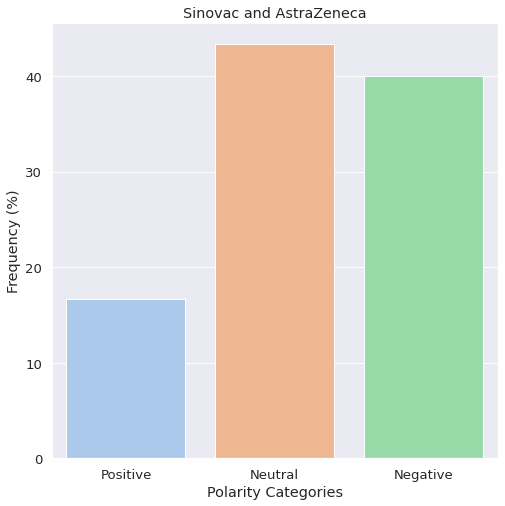

In [32]:
from google.colab import files

labels = ['Positive','Neutral','Negative']

#sns.set_style('ticks')
sns.set(font_scale = 1.2)
plt.figure(figsize=(8, 8))
ax = sns.barplot(labels,final_last, palette = 'pastel')
ax.set(title="Sinovac and AstraZeneca")
plt.xlabel("Polarity Categories")
plt.ylabel("Frequency (%)")
plt.show()
#plt.savefig("sinovac_astra.png")
#files.download("sinovac_astrs.png") 